In [1]:
import spyglass as nd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spyglass.common import (Session, IntervalList,LabMember, LabTeam, Raw, Session, Nwbfile,
                            Electrode,LFPBand,interval_list_intersect)
from spyglass.common import TaskEpoch

nwb_file_name = 'eliot20221016.nwb'

[2024-02-12 16:28:33,487][INFO]: Connecting shijiegu@lmf-db.cin.ucsf.edu:3306
[2024-02-12 16:28:33,533][INFO]: Connected shijiegu@lmf-db.cin.ucsf.edu:3306
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/position_tools/core.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
[16:28:34][WARNING] Spyglass: Please update position_tools to >= 0.1.0


In [2]:
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename

nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [11]:
IntervalList_pd=pd.DataFrame(IntervalList & {'nwb_file_name': nwb_copy_file_name})
interval_pd=pd.DataFrame((TaskEpoch & {'nwb_file_name':nwb_copy_file_name}).fetch())
interval_pd.insert(5, "pos_name", '')

# select position timestamps, only maze sessions or sleep are selected
for i in IntervalList_pd.index:
    interval=IntervalList_pd['interval_list_name'][i]
    if interval[0:3]=='pos':
        interval_pd.loc[int(interval[4:6]),'pos_name']=interval

#position_interval=interval_pd.pos_name #use this line if needed
session_interval=[]
position_interval=[]
for i in interval_pd.index:
    if interval_pd.loc[i,"task_name"]=="maze":
        session_interval.append(interval_pd.loc[i,"interval_list_name"])
        position_interval.append(interval_pd.loc[i,"pos_name"])
        
print(session_interval)
print(position_interval)

['02_Seq2Session1', '04_Seq2Session2', '06_Seq2Session3', '08_Seq2Session4']
['pos 1 valid times', 'pos 3 valid times', 'pos 5 valid times', 'pos 7 valid times']


## Select a session

In [26]:
ind = 1
session_name = session_interval[ind]
position_name = position_interval[ind]

In [27]:
from spyglass.common.common_position import IntervalPositionInfo

In [3]:
from spyglass.common.common_position import RawPosition

In [28]:
position_info = (IntervalPositionInfo() &
                 {'nwb_file_name': nwb_copy_file_name,
                  'interval_list_name': position_name,
                  'position_info_param_name': 'default'}
                ).fetch1_dataframe()
position_info

[2023-10-11 09:20:27,939][WARNING]: Skipped checksum for file with hash: fbaa5021-a0e2-dcfe-9a3a-88bf7d1ef8af, and path: /stelmo/nwb/analysis/eliot20221016/eliot20221016_M3Q9JZA60F.nwb
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationW

,head_position_x,head_position_y,head_orientation,head_velocity_x,head_velocity_y,head_speed
time,,,,,,
1.665950e+09,209.1250,230.2500,-0.218669,3.539436,1.389834,3.802531
1.665950e+09,209.6875,230.5000,-0.628796,3.599179,1.463809,3.885464
1.665950e+09,209.6875,230.4375,-0.685730,3.130783,1.436069,3.444430
1.665950e+09,209.6250,230.3750,-0.785398,2.320498,1.388335,2.704105
1.665950e+09,210.1250,230.6250,-1.428899,1.419422,1.334813,1.948457
...,...,...,...,...,...,...
1.665952e+09,NaN,NaN,NaN,NaN,NaN,NaN
1.665952e+09,NaN,NaN,NaN,NaN,NaN,NaN
1.665952e+09,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Head Position')

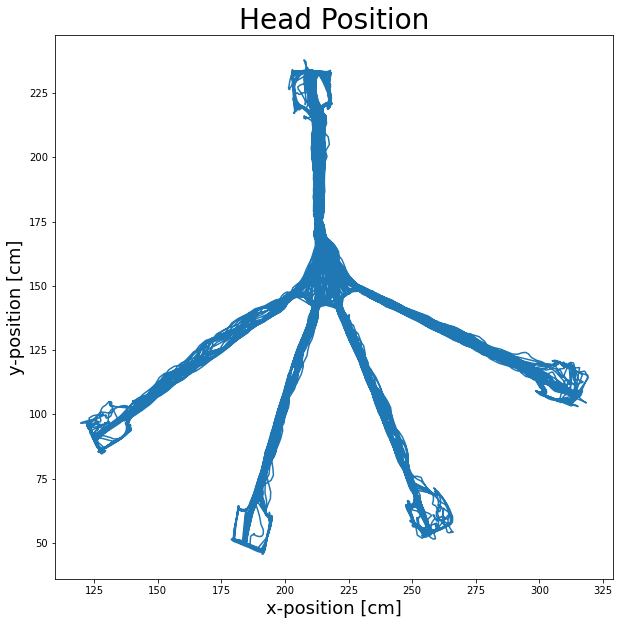

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(position_info.head_position_x, position_info.head_position_y)
ax.set_xlabel('x-position [cm]', fontsize=18)
ax.set_ylabel('y-position [cm]', fontsize=18)
ax.set_title('Head Position', fontsize=28)

Text(0.5, 1.0, 'Head Velocity')

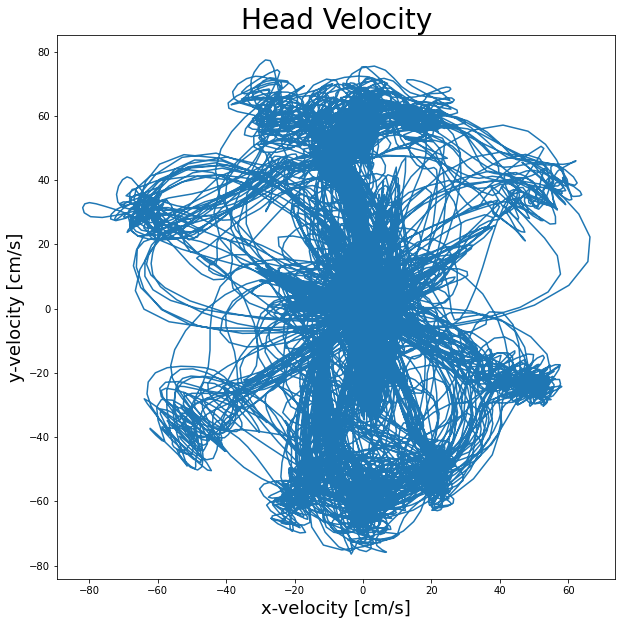

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(position_info.head_velocity_x, position_info.head_velocity_y)
ax.set_xlabel('x-velocity [cm/s]', fontsize=18)
ax.set_ylabel('y-velocity [cm/s]', fontsize=18)
ax.set_title('Head Velocity', fontsize=28)

In [31]:
from spyglass.common.common_position import TrackGraph

graph = TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}
graph

track_graph_name,environment Type of Environment,"node_positions 2D position of track_graph nodes, shape (n_nodes, 2)","edges shape (n_edges, 2)","linear_edge_order order of track graph edges in the linear space, shape (n_edges, 2)","linear_edge_spacing amount of space between edges in the linear space, shape (n_edges,)","linear_edge_specialty denote what edges (denote by 5) are going to be lumped to what edge (denote by 1), shape (n_edges,)","edge_map like linear_edge_specialty but in dictionary, denote what edges id (key) are going to be lumped to what edge id (denote by value)"
4 arm lumped 2023,4 arm lumped 2023,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [41]:
node_positions = (TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}).fetch1('node_positions')
edges = (TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}).fetch1('edges')

In [79]:
node_positions

array([[210.25, 234.  ],
       [214.25, 176.5 ],
       [197.75, 146.5 ],
       [126.75,  96.25],
       [210.25, 138.25],
       [186.  ,  54.5 ],
       [223.75, 139.5 ],
       [257.75,  59.75],
       [233.75, 148.  ],
       [310.5 , 110.75],
       [215.75, 142.75]])

In [78]:
edges 

array([[ 0,  1],
       [ 1, 10],
       [ 1,  2],
       [ 2,  3],
       [ 1,  4],
       [ 4,  5],
       [ 1,  6],
       [ 6,  7],
       [ 1,  8],
       [ 8,  9]])

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


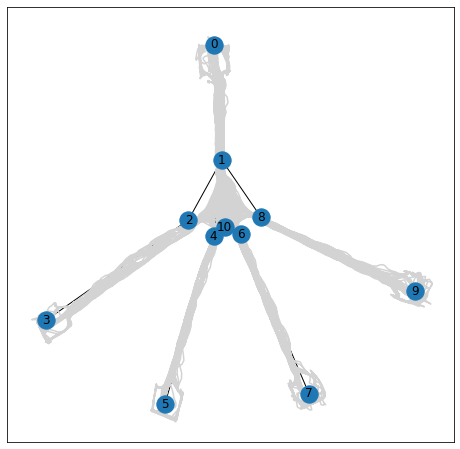

In [44]:
import track_linearization as ti

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(position_info.head_position_x, position_info.head_position_y, color='lightgrey')

track_graph=ti.make_track_graph(node_positions, edges)
ti.plot_track_graph(track_graph)


In [62]:
arm_vectors = np.zeros((2,4))
arm_vectors[:,0] = node_positions[3]-node_positions[2]
arm_vectors[:,1] = node_positions[5]-node_positions[4]
arm_vectors[:,2] = node_positions[7]-node_positions[6]
arm_vectors[:,3] = node_positions[9]-node_positions[8]

In [63]:
arm_vectors = arm_vectors / np.sqrt(np.sum(arm_vectors**2,axis=0)) #unit vector

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


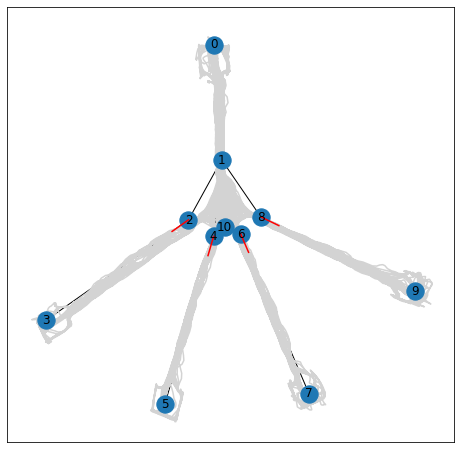

In [77]:
import track_linearization as ti

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(position_info.head_position_x, position_info.head_position_y, color='lightgrey')

track_graph=ti.make_track_graph(node_positions, edges)
ti.plot_track_graph(track_graph)

for a in range(4):
    b = node_positions[(a+1)*2] #base of the vector
    v = 10*arm_vectors[:,a] + node_positions[(a+1)*2] #plot 10x unit vector to see the unit vector
    plt.plot([b[0],v[0]],[b[1],v[1]],color='r')